# 機械学習・データ分析(2019) 学年末卒業課題

## 課題提出期限
#### 2020年2月10日（月）10時40分

## 課題タイトル
#### Bike Sharing Demandによるバイク貸出数の分析と予測

## 課題実施方法
#### 配布されたjupyter notebookに基づいて，Pythonプログラムにより分析と予測を実施し，その結果と結論とを同じjupyter notebookに記載して，ファイル名を学籍番号_2020_bike.ipynbとして，sugimura@ccg.ac.jpへメール添付ファイルとして送信

## 課題説明
1. 配布jupyter notebook中の解説・コードを読んで，bike貸出数の分析と予測を行う手法・手順を理解する．
1. 配布資料に記載されている分析及び予測は，不十分な例であるため，分析及び予測の精度を高めるための方針を決める．
1. 方針にしたがって，分析プログラムと予測モデルを変更し，結果を評価する．
1. 方針，分析結果，予測の結果をjupyter notebookに記載する．
1. 満足できる結果が得られたならば，課題終了．もし，予測結果を高めるための工夫の余地があるならば，新たな方針を立てて，4.に戻る．
1. 結論をまとめて，jupyter notebookのファイル名を学籍番号_2020_bike.ipynbとして，sugimura@ccg.ac.jpへ送信する．

## 評価のポイント
+ 提出期限内に提出できているかどうか（40点）
+ 分析・予測モデル構築・評価の手法について理解できているか（30点）
+ 分析・予測モデル構築・評価を論理的に行っているか（たとえば，適切な分析を行っているか，分析の結果が予測モデルに反映しているか，予測結果と結論が合理的であるか）(30点）

## 2020年1月26日までに課題提出済みの方へ
+ 2020年1月20日時点でお知らせした内容にしたがって課題が提出されていれば，再提出の必要はありません．ただし，再提出しても構いません．
+ 再提出しない場合であっても，課題は実施してください．

## Google Colaboratoryの使用について
+ 配布したコードでは，モデル構築の際に機械学習を行います．Microsoft Azure Notebookを使った場合，学習終了まで数分を要することがあります．
+ 学習時間を短縮するために，Google Colaboratoryを用いることも可能です．Google Colaboratory用のjupyter notebookも同時に配布します．
+ Google Colaboratory版では，Google Driveを使うための特別なコードを挿入しています．

# Bike Sharing Demand

### 以下の作業を行います

#### ①2年間(2011-2012)の，1時間ごとのレンタル自転車の貸出数と，気象データ等が記録されたデータファイルを読み込む
#### ②貸出数に影響を与えるパラメータ（貸出数との相関が大きいパラメータ）を見つける
#### ③見つけ出したパラメータを使って貸出数を予測するモデルを構築する
#### ④モデルの予測性能を評価する


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

from IPython.display import Image, display

In [2]:
# google drive のマウント

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# 各自の環境に応じてfile_pathを設定　
# /machine_learning_&_data_analysis/の部分を変更すること
file_path = '/content/drive/My Drive/Colab Notebooks/machine_learning_&_data_analysis/'

### データ読み込み

In [4]:
df = pd.read_csv(file_path + 'bike.csv')
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 時刻データを年，月，日，曜日，時刻に分割

In [6]:
# year, month, day, day of week, time
df['datetimeobj'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetimeobj'].dt.year
df['month'] = df['datetimeobj'].dt.month
df['day'] = df['datetimeobj'].dt.day
df['dayofweek'] = df['datetimeobj'].dt.dayofweek
df['hour'] = df['datetimeobj'].dt.hour

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetimeobj,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,5,4


### 貸出数の推移を確認

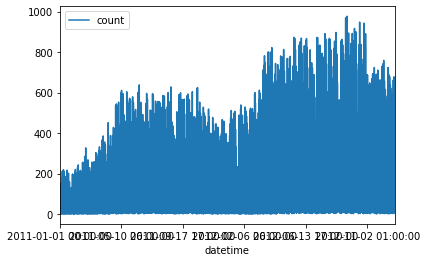

In [7]:
df.plot(x='datetime', y='count')

#### 2011年より2012年の方が貸出数増加
#### 1〜3月（春）の貸出数が少ない

### 月ごとの貸出数

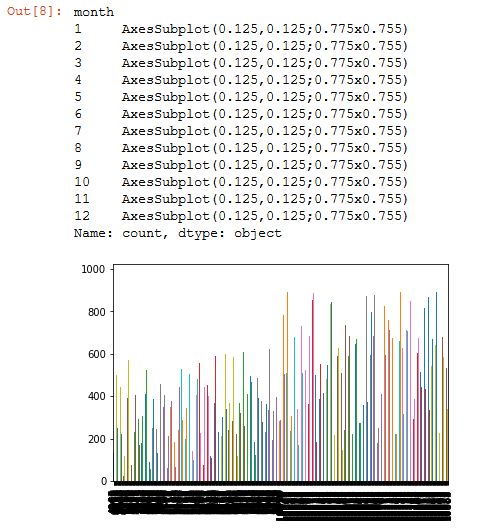

In [8]:
# 表示に時間を要するのでコメントアウトした！
#plt.figure()
#df.groupby('month')['count'].plot(kind='bar')
Image(file_path + 'monthly_counts.png')

#### 1日単位でグラフ表示をしても傾向を把握できない

### （ヒント）　月ごとに，その月の毎日の貸出数の平均をグラフ化する
#### 以下のコードのA，Bに適当な変数名を入れると，貸出数の平均をグラフ化できる

In [9]:
plt.figure()
# df.groupby('A')['B'].mean().plot(kind='bar')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

#### （ヒント）月ごとの貸出数に特徴はあるか？

### （ヒント）季節ごとの貸出数に特徴はあるか？

In [0]:
pass

#### 季節ごとの特徴は？

### (ヒント）日ごとの貸出数（平均）を調べる

In [0]:
pass

#### 1〜19日までのデータしかないのは，1〜19日がトレーニングデータとして提供され，20日以降がテスト用データとして提供されているためである．

### (ヒント)曜日ごとの貸出数（平均）を調べる

In [0]:
pass

#### 曜日による差はあるか？

### (ヒント）時刻ごとの貸出数（平均）を調べる

In [0]:
pass

#### 深夜帯の貸出数はどうか．朝夕の通勤時間帯の貸出数は？

### (ヒント）休日holiday／非休日における時刻ごとの貸出数（平均）

In [14]:
holiday_hour = df.groupby(['holiday', 'hour'])['count'].mean()
holiday_hour

holiday  hour
0        0        54.796380
         1        33.582766
         2        22.747126
         3        11.738717
         4         6.377622
         5        19.961276
         6        77.357466
         7       216.119910
         8       366.703620
         9       222.088235
         10      173.461538
         11      208.787330
         12      254.693002
         13      255.774266
         14      241.164786
         15      253.169300
         16      316.417607
         17      471.722348
         18      433.392777
         19      316.306998
         20      228.792325
         21      173.121896
         22      133.347630
         23       90.009029
1        0        66.769231
         1        43.230769
         2        28.000000
         3        12.416667
         4         7.384615
         5        13.230769
         6        38.923077
         7       111.000000
         8       229.000000
         9       211.307692
         10      230.538462
      

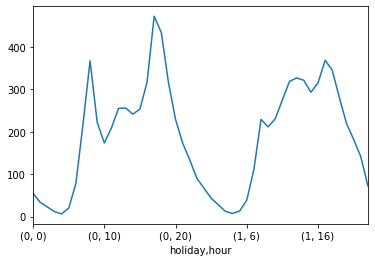

In [15]:
holiday_hour.plot()

### （ヒント）休日における時刻ごとの貸出数（平均）を調べる

In [0]:
pass

#### （ヒント）グラフ表示

In [0]:
#holiday_hour_2.plot(label='holiday')
#plt.legend(fontsize=12)

### 上のグラフは、holidayにおける時刻別の貸出数のグラフ
### それでは、
+ holiday以外の日における時刻別の貸出数
+ workingdayにおける時刻別の貸出数
+ 非workingdayにおける時刻別の貸出数
### もグラフ化して、一つのグラフに表示しよう！


In [0]:
#plt.figure()

pass

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)                                    
                                        

#### （ヒント）workingday, holiday, non-working day, non-holidayに貸出数の特徴はあるか？

### (ヒント）季節による貸出数の時刻変化も調べてみよう

#### 春はseason = 1, 夏はseason = 2, 秋はseason =3 ,冬はseason=4とする．

In [0]:
#plt.figure()

pass

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)                                            

#### (ヒント）季節によって時間帯ごとの貸出数に差はあるか？貸出数が少ない季節はあるか？

### 天候による貸出数の差異（合計）を調べる

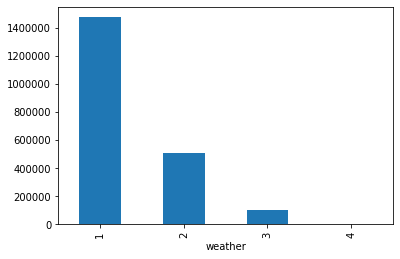

In [20]:
df.groupby('weather')['count'].sum().plot(kind='bar')

１・・・晴れ　　２・・・曇り　　３・・・雨　　４・・・大雨

### （ヒント）天候による貸出数の差異（平均）を調べる

In [0]:
pass

#### （ヒント）大雨の日に貸出数（平均）が大きいが，大雨の日は1日しかなく，平均をとる意味がないので，大雨の日は無視する．

### 天候毎の貸出数の時間変化（平均）を調べる

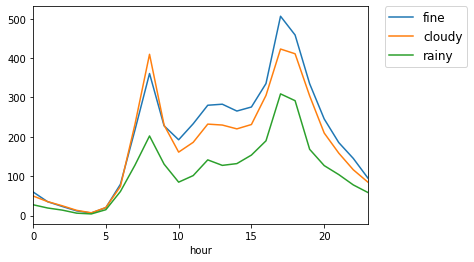

In [22]:
df.query('weather == 1').groupby('hour')['count'].mean().plot(label='fine')
df.query('weather == 2').groupby('hour')['count'].mean().plot(label='cloudy')
df.query('weather == 3').groupby('hour')['count'].mean().plot(label='rainy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)    

#### 天候によって時間帯ごとの貸出数の傾向は変わらない．ただし，雨の日の貸出数は少ない．

### （ヒント）気温，体感温度，湿度，風速との関係を調べる

<Figure size 432x288 with 0 Axes>

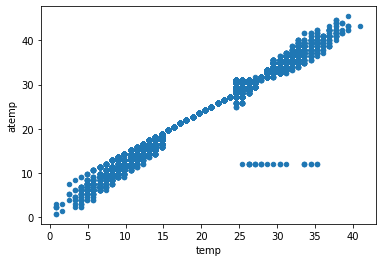

In [23]:
# 気温と体感温度との関係
plt.figure()
df.plot(x='temp', y='atemp', kind='scatter')


#### (ヒント）気温と体感温度を散布図にプロットすると、ほぼ直線上に並んでいる．

#### 気温と体感温度との間にはどのような関係があるか？

<Figure size 432x288 with 0 Axes>

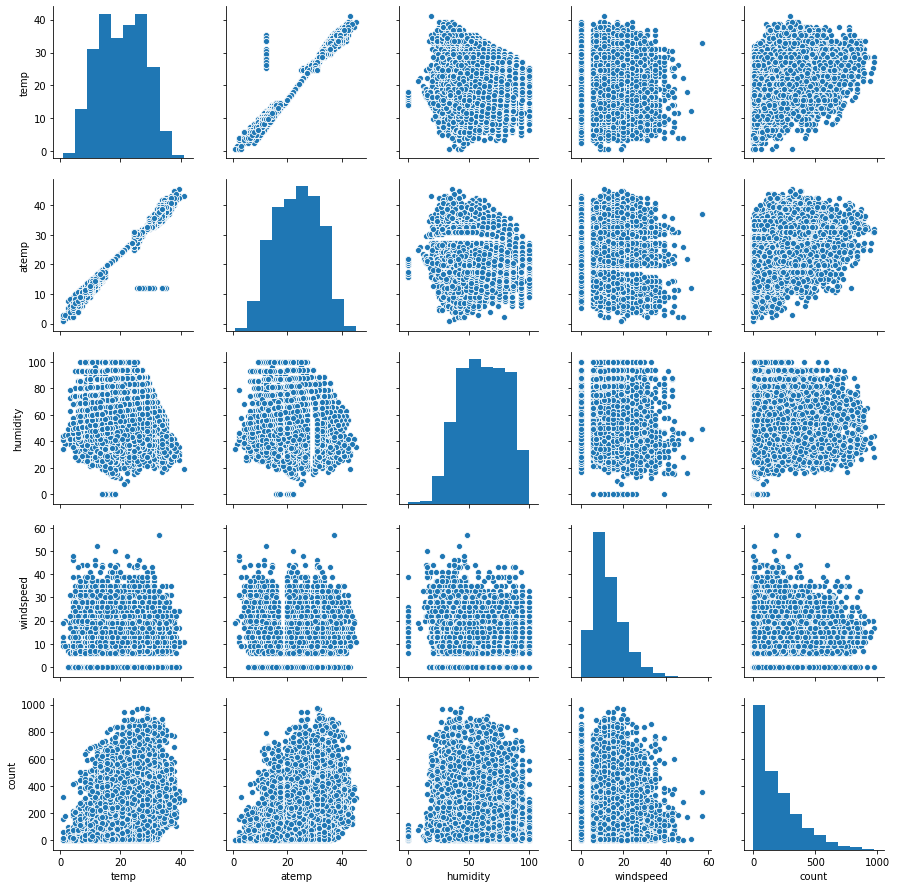

In [24]:
#import seaborn as sns
# 温度，体感温度，湿度，風速，貸出数の関係
plt.figure()
sns.pairplot(data=df[['temp', 'atemp', 'humidity', 'windspeed', 'count']])


#### Seabornを使うと、各要素の分布ヒストグラムとすべての要素の組み合わせの散布図とを表示できる。

#### 散布図から何が読み取れるか？

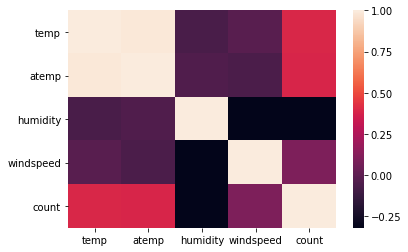

In [25]:
# 相関係数をヒートマップで表示
plt.figure()
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr())

#### ヒートマップも表示した．

#### 温度，体感温度，湿度，風速と貸出数との間にどのような関係があるか？


### （ヒント）会員か非会員かによる時刻ごとの貸出台数の違いを調べよう

In [0]:
pass

#### (ヒント）会員と非会員とを分けて調べると，貸出数にどのような特徴があるか？

### （ヒント）会員／非会員、平日／土日・祝日による貸出数の違いを調べよう
#### 会員＆workingday，会員＆non-working day，非会員＆workingday，非会員&non-working dayの4つの場合について貸出数の特徴を調べる

In [0]:
pass

#### （ヒント）非会員は（？）の貸出数が多い。
#### （ヒント）会員は（？）の貸出数の方が多い。

### （ヒント)　直前のセルで調べた4通りの条件に関して，時刻ごとの貸出数を調べよう

In [0]:
pass

#### (ヒント）たとえば，次のようなグラフを描くことができる．

In [29]:
Image(file_path + 'working_nonworking.png')

#### このグラフから分かることは？

### データ分析まとめ

以上の分析から，たとえば，以下の特徴を見つけることができる．？部分は各自で見つけること．

+ 2011年に比べて2012年は？
+ 春（1〜3月）に？
+ 日による差は？
+ 曜日による差は？
+ 平日には？にレンタル数が多い
+ 休日には？にレンタル数が多い
+ 雨の日の貸出数は？（大雨の日のデータは？）
+ 温度，体感温度は？
+ 湿度，風速は，レンタル数に？
+ 非会員は．？にレンタル数が多い
+ 会員は，？にレンタル数が多い





## 回帰分析

回帰分析は，目的変数と説明変数との間の関係性を求める分析手法である．まず最初に，説明変数が1個である単回帰分析を行う．目的変数と説明変数との関係を求めることによって，説明変数から目的変数の値を予測することができる．

目的変数$y$が，$y = a*x + b$の関係式で表される場合に，$a$と$b$を求める手法が回帰分析である．



### 目的変数$y$をcountとし，説明変数$x$をmonthとした場合の回帰分析は以下のとおりである．

In [30]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#import statsmodels.formula.api as sm


# 説明変数と目的変数
X = df.loc[:, ['month']].values
y = df.loc[:, ['count']].values

# トレーニングデータとテストデータとの分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 回帰分析(最小二乗法による回帰分析)
model = sm.ols(formula = 'count ~ month', data = df)

# 回帰分析を実行
result = model.fit()

# 分析結果
print(result.summary())
print(result.params['Intercept'])
print(result.params['month'])


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     311.7
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           8.34e-69
Time:                        14:49:54   Log-Likelihood:                -71892.
No. Observations:               10886   AIC:                         1.438e+05
Df Residuals:                   10884   BIC:                         1.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.3446      3.666     36.649      0.0

#### 回帰分析の結果を考察

回帰分析の結果から，直線の傾きと切片は，それぞれ，<br>
+ 傾き = month = 8.7755
+ 切片 = Intercept = 134.3446 <br>
であることがわかった．つまり，countとmonthとの関係は，<br>
$ count = 8.7755 * month + 134.3446 $<br>
と表すことができる．<br>

OLS Regression Resultsにおけるいくつかの重要なデータについて説明する<br>
+ R-squared: 説明変数がどの程度目的関数を説明しているかを表す決定係数．この値が１に近づくほど，推定した回帰式の当てはまりがよい，と判断する．
+ Adj. R-squared:調整済みの決定係数．決定係数は，サンプル数が少なく，かつ，説明変数の数が多くなる程，1に近づく性質がある．そこで，Adj. R-squaredは，サンプル数と説明変数の数の影響を調整した決定係数である．
+ F-statistic:F統計量．F値が大きい程，回帰モデルが信頼できる．
+ coef:回帰係数(coefficient)．回帰分布により求める値．
+ std err:標準誤差(standard error)．推定料の標準偏差．推定した係数がどの程度のばらつきを持つかという推定量の精度の高さを表す．
+ t:t値．係数を標準誤差で割ったもの．つまり，係数が標準誤差いくつ分であるかを示す．有意水準を5%とする場合，t値の絶対値が2位上であれば，統計学的に優位であることを意味する．
+ P>|t|:P値は，データ分析結果の優位性を示す数値である．この結果が偶然により発生した確率（帰無仮説が成立する確率）を表す．t値が求められれば，P値は自動的に計算できる．有意水準を5%とすると，P値が0.05以下の場合に，帰無仮説が棄却され，統計的に優位である，と解釈できる．
+ 0.025:95%信頼区間の下限値
+ 0.975:95%信頼区間の上限値




### 結果をグラフ表示
#### 回帰分析結果から回帰直線用のデータを生成する

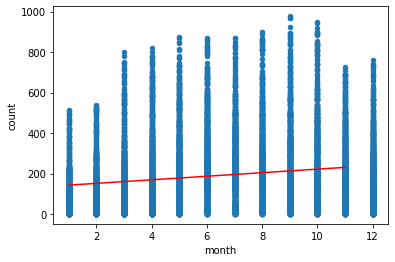

In [31]:
ax = np.arange(1, 12, 1)
ay = result.params['month'] * ax + result.params['Intercept']

ax2 = df.plot(x = 'month', y = 'count', kind = 'scatter')
ax2.plot(ax, ay, color = 'r')

月ごとの貸出数から毎月の貸出数を予測することは難しい！

#### 説明変数を温度として回帰分析を行う

In [32]:
# 説明変数と目的変数
X = df.loc[:, ['temp']].values
y = df.loc[:, ['count']].values

# トレーニングデータとテストデーtとの分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 回帰分析(最小二乗法による回帰分析)
model = sm.ols(formula = 'count ~ temp', data = df)

# 回帰分析を実行
result = model.fit()

# 分析結果
print(result.summary())
print(result.params['Intercept'])
print(result.params['temp'])


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2006.
Date:                Sat, 25 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:49:55   Log-Likelihood:                -71125.
No. Observations:               10886   AIC:                         1.423e+05
Df Residuals:                   10884   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0462      4.439      1.362      0.1

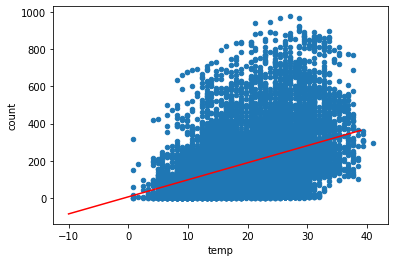

In [33]:
ax = np.arange(-10, 40, 1)
ay = result.params['temp'] * ax + result.params['Intercept']

ax2 = df.plot(x = 'temp', y = 'count', kind = 'scatter')
ax2.plot(ax, ay, color = 'r')

#### 温度と貸出数との間には，多少相関関係があるようにも見えるが，温度だけから貸出数を予測することは難しい．

## 重回帰分析

1つの説明変数から目的変数を予測することは難しいことが分かった．そこで，複数の説明変数と目的変数との関係を求める重回帰分析を用いることにする．

上の例では，説明変数として温度を用いた．ここでは，温度に加えて，時刻を説明変数として用いることにする．


### 質的変数をカテゴリ変数に変換

ここで，season, holiday, workingday, year, month, hourなどの質的変数を回帰分析の説明変数として用いるために，これらの質的変数をカテゴリ変数に変換する．

In [0]:
# 質的変数をカテゴリ変数に変換する
for v in ["season","holiday","workingday","weather","month","year","hour"]:
    df[v] = df[v].astype("category")
    

#### 温度tempと，時刻hourを説明変数として，重回帰分析を行う．

In [35]:
model_w = sm.ols(formula="count ~ hour + temp", data=df)
result_w = model_w.fit()
print(result_w.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     662.9
Date:                Sat, 25 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:49:55   Log-Likelihood:                -67135.
No. Observations:               10886   AIC:                         1.343e+05
Df Residuals:                   10861   BIC:                         1.345e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -71.9198      6.090    -11.809      0.0

#### R-squaredとAdj. R-squaredが共に0.59程度である．

#### (ヒント）これらの値が0.8以上となるような説明変数を見つけたい．

#### （ヒント）workingdayとnon-working dayとでは，貸出のパターンに違いがあった．この2つのパターンを1つのモデルで表現すると，モデルの予測精度が低下する．そこで，workingdayとnon-working dayとで別々のモデルを構築することを考える．

### (ヒント）以下の方針でモデルを構築する
#### workingdayとnon-working dayとは別々のモデル（別々に分析する）
#### 説明変数として？を利用する


In [0]:
# 平日
# workingdayの場合の予測
# countを，いくつかの説明変数の線形結合で表現する


# 土日祝日
# non-working dayの場合もcountを予測する式を学習する



#### 重回帰分析の結果は以下のとおり

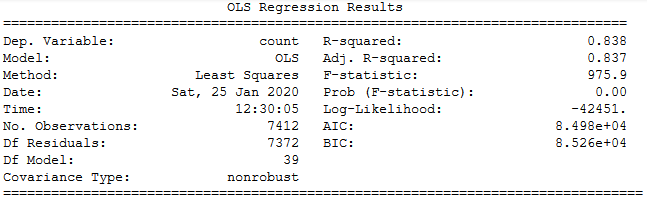

In [36]:
# workingday
Image(file_path + 'regression(workingday).png')

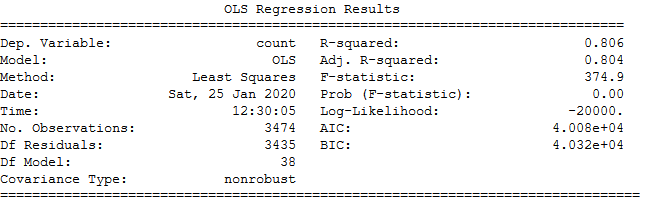

In [37]:
# non-working day
Image(file_path + 'regression(non-working day).png')

#### workingdayの場合もnon-working dayの場合もR-squaredが0.8以上となっているので，選択した説明変数が高い精度で目的変数を説明できることがわかった．

#### そこで，説明変数？を使って貸出数を予測するモデルを構築する

#### モデルには，ランダムフォレストモデルを採用する


## ランダムフォレスト

ランダムフォレストは，機械学習のアルゴリズムの1つである．学習用のデータセットをランダムにサンプリングして多数の決定木を作成し，決定木分析を繰り返すことで，作成した多数の決定木の集まり（＝森）を元にして，重ね合わせによって結果を求める方法である．<br>
精度と汎用性が高く，扱いやすい手法である，といわれている．


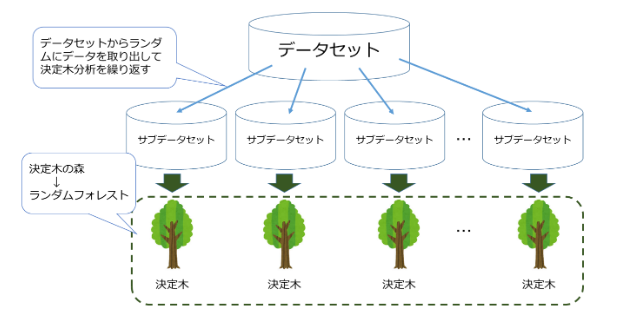

In [38]:
Image(file_path + 'random_forest_1.png')

## ランダムフォレストの特徴
+ 母集団のデータ数が多く変数が多い場合に精度が高くなる
+ 目的変数の割合に偏りがあっても，バランスが保たれる（精度を保ったまま分析できる）
+ 分類に用いる変数の重要度を推定できる
+ ただし，決定過程がブラックボックス化しやすい

## 以下のコードは，titanic号のデータにランダムフォレストを適用し，生存者の予測モデルを構築した例である．


【実行結果】
ランダムフォレスト
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

トレーニングデータとテストデータに分ける
(train_X, test_X, train_y, test_y) = train_test_split(df_X, df_y, test_size=0.3, random_state=0)

ランダムフォレストモデルを生成
n_estimators 決定木をいくつ生成するか（デフォルトは10）
clf0 = RandomForestClassifier(random_state=0, n_estimators=20)
clf = clf0.fit(train_X, train_y)

結果検証
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)

AUC １に近づくほど良い
print('AUC:', auc(fpr, tpr))

正答率
print('score:', accuracy_score(pred, test_y))

## bike sharing demandにランダムフォレストモデルを用いて，バイク貸出数予測モデルを構築する

### 各自工夫するポイントは，説明変数の選び方である
### 回帰分析や重回帰分析の結果に基づいて，目的変数である貸出数を予測するために有効な変数を選ぶ
### その他のパラメータは変更しない方がよい


In [0]:
# ランダムフォレストモデル
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier


#### 説明変数として，month, hour, tempを選んだ！

In [0]:
# 説明変数（説明変数の選び方がポイント）
df_X = df[['month', 'hour', 'temp']]
# 目的変数
df_y = df['count']

# データセットをトレーニングデータとテストデータとに分ける
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size = 0.3, random_state = 0)

# ランダムフォレストモデルを生成
# 決定木の数=n_estimators は，10とする
clf0 = RandomForestClassifier(random_state = 0, n_estimators = 10)
clf = clf0.fit(train_X, train_y)


In [41]:
# 結果検証
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label = 1)

# AUCは，１に近づくほどよい
print('AUC:', auc(fpr, tpr))

# 正答率
print('score:', accuracy_score(pred, test_y))



AUC: 0.06982564065230051
score: 0.01837109614206981


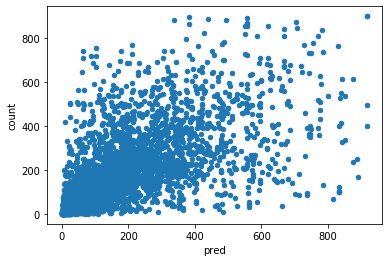

In [42]:
# 結果を散布図表示
result = pd.DataFrame(test_y)
result['pred'] = pred
result.plot(x = 'pred', y = 'count', kind = 'scatter')

### 予測精度が向上するように，説明変数を選んで，予測モデル構築し，モデルの予測性能を評価してください．

In [0]:
# 説明変数（説明変数の選び方がポイント）
pass
# 目的変数
pass

# データセットをトレーニングデータとテストデータとに分ける
pass

# ランダムフォレストモデルを生成
# 決定木の数=n_estimators は，10とする
pass



In [0]:
# 結果検証
pass


# AUCは，１に近づくほどよい
pass

# 正答率
pass


In [0]:
# 結果を散布図表示
pass